Supervisor Process to manage the workers.
---
Diogo Pessoa

Workers in this contexts are other Jupyter notebooks with smaller scope of work.


In [1]:
import matplotlib.pyplot as plt

data_file = 'combined_data.csv'  # Load variable so data_loader can locale the csv filesystem path accordingly.
%run data_loader.ipynb 

Data loaded:
- features: All features.
- label: label (views_log).
- x_train_sc: Scaled training features.
- x_test_sc: Scaled testing features.
- x_train - Training features.
- x_test - Testing features.
- y_train - Training labels.
- y_test - Testing labels.


In [2]:
combined_data.head(3)

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,...,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,...,False,False,False,False,False,False,False,False,False,True
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,...,False,False,False,True,False,False,False,False,False,False
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,...,False,False,False,False,False,False,False,False,False,True


In [3]:
import pandas as pd

# Assuming combined_data is your DataFrame
# Create a DataFrame to hold column names and data types
dtypes_df = pd.DataFrame(combined_data.dtypes, columns=['Data Type'])
dtypes_df.index.name = 'Column Name'
dtypes_df.reset_index(inplace=True)

# Display the DataFrame
dtypes_df

,Column Name,Data Type
0,comments_disabled,bool
1,ratings_disabled,bool
2,video_error_or_removed,bool
3,likes_log,float64
4,label,float64
5,dislikes_log,float64
6,comment_log,float64
7,num_tags,int64
8,desc_len,int64
9,len_title,int64


In [4]:
combined_data.dtypes

Column Name
comments_disabled                    bool
ratings_disabled                     bool
video_error_or_removed               bool
likes_log                         float64
label                             float64
dislikes_log                      float64
comment_log                       float64
num_tags                            int64
desc_len                            int64
len_title                           int64
country_CA                           bool
country_FR                           bool
country_IN                           bool
country_US                           bool
category_Autos & Vehicles            bool
category_Comedy                      bool
category_Education                   bool
category_Entertainment               bool
category_Film & Animation            bool
category_Gaming                      bool
category_Howto & Style               bool
category_Movies                      bool
category_Music                       bool
category_News & Politi

In [5]:
%run FeatureEngineering/PCA.ipynb # Using 34 components as optmized by the PCA on initial Notebook

PCA applied to the training and testing features:
- x_train_pca_Trans_sc: Scaled training features.
- x_test_pca_Trans_sc: Scaled testing features.
- x_train_pca_Trans - Training features.
- x_test_pca_Trans - Testing features.


discarded features: ['category_News & Politics' 'category_People & Blogs'
 'category_Pets & Animals' 'category_Trailers' 'publish_weekday_4']


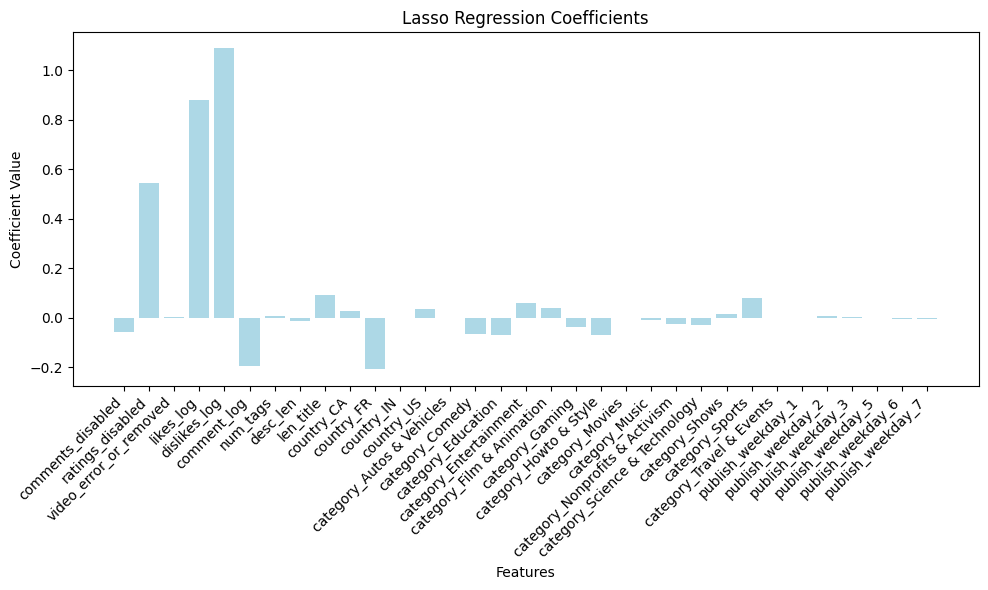

LassoCV Reduced Features to the training and testing features:
- x_train_reduced_sc: Scaled training features.
- x_test_reduced_sc: Scaled testing features.


In [6]:
# LassoCV to find the best features
%run FeatureEngineering/LassoCV.ipynb

In [7]:
# Baseline comparison Using Random Forest
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40) # Note that the parameters were optimized on the initial notebook

for train, test, name in [
    [x_train_sc, x_test_sc, 'baseline'], 
    [x_train_pca_Trans_sc, x_test_pca_Trans_sc, 'pca'],
    [x_train_reduced_sc, x_test_reduced_sc, 'lasso_reduced']]:
    
    start = time.time()
    reg_RF.fit(train, y_train)
    # Calculate the duration
    end_time = time.time()
    duration = end_time - start
    
    # predict
    pred = reg_RF.predict(test)
    
    # metrics
    mse = mean_squared_error(y_test, pred)
    r_two_score = r2_score(y_test, pred)
    ex_variance_score = explained_variance_score(y_test, pred)

    print(f"{name} training took {duration:.4f} seconds.")
    print(f'Mean Squared Error on Test Set: {mse:.4f}')
    print(f'r2 score: {r_two_score:.4f}')
    print(f'explained variance score: {ex_variance_score:.4f}')

baseline training took 134.3373 seconds.
Mean Squared Error on Test Set: 0.1990
r2 score: 0.9399
explained variance score: 0.9400
pca training took 721.7842 seconds.
Mean Squared Error on Test Set: 0.2239
r2 score: 0.9324
explained variance score: 0.9325
lasso_reduced training took 128.5239 seconds.
Mean Squared Error on Test Set: 0.1987
r2 score: 0.9400
explained variance score: 0.9401


Ensemble Models
---

From here on we'll use the best performing dataset the `x_train_reduced_sc` [LassoCV](notebooks/FeatureEngineering/LassoCV.ipynb) to compare the ensemble Methods.

Notebooks:
* [Bagging.ipynb](notebooks/Task_2_Bagging.ipynb)
  * We'll skip the Random Forest as it's already been used as the baseline.
    * Voting Regressor will use Gradient Boosting and KNR (same will be used for Stacking)
* [Boosting.ipynb](notebooks/Task_2_Boosting.ipynb)
  * Gradient Boosting Regressor 
* [Stacking.ipynb](notebooks/Task_2_Stacking.ipynb)
  * Stacking Regressor will use Gradient Boosting and KNR

All notebooks are set to use the same train and test sets, so we can compare the results.
 
    LassoCV Reduced Features to the training and testing features:
        - x_train_reduced_sc: Scaled training features.
        - x_test_reduced_sc: Scaled testing features.


## Running Ensemble Models - Bagging, Boosting and Stacking 

        This Section runs twice, once to collect metrics as a baseline (after LassoCV). Then, a repeat with new paraters resulting from the hyperparameter tuning.

In [8]:
%run Task_2_Bagging.ipynb

<class 'sklearn.ensemble._voting.VotingRegressor'> training took 239.2188 seconds.
Mean Squared Error on Test Set: 0.2732
r2 score: 0.9175
explained variance score: 0.9176
<class 'sklearn.ensemble._bagging.BaggingRegressor'> training took 185.4544 seconds.
Mean Squared Error on Test Set: 0.1981
r2 score: 0.9402
explained variance score: 0.9402


In [9]:
%run Task_2_Boosting.ipynb

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> training took 56.1123 seconds.
Mean Squared Error on Test Set: 0.3466
r2 score: 0.8954
explained variance score: 0.8954


In [10]:
%run Task_2_Stacking.ipynb

<class 'sklearn.ensemble._stacking.StackingRegressor'> training took 319.4173 seconds.
Mean Squared Error on Test Set: 0.3798
r2 score: 0.8853
explained variance score: 0.8854


HyperparameterTuning
---

Review metrics from previous runs and pick the best performers to apply tuning. 

        Note, we could run the tuning on each model iteratively. However mindful of time to deliver project, we'll focus on the best performing ensemble models.
        
Notebooks:
* [Bayesian_optimization.ipynb](notebooks/HyperparameterTuning/Bayesian_optimization.ipynb)
* [GridSearchCV.ipynb](notebooks/HyperparameterTuning/GridSearchCV.ipynb)

Both are using the same set of Ensemble models and the same train and test sets. So we can compare the results.

    LassoCV Reduced Features to the training and testing features:
        - x_train_reduced_sc: Scaled training features.
        - x_test_reduced_sc: Scaled testing features.
        
Selected models:

        I'll continue running one of the three approaches to tune the hyperparameters for the best performing models so far:

* boosting `GradientBoostingRegressor`
* Stacking `StackingRegressor` (using Gradient Boosting and KNR)
* Bagging `BaggingRegressor`
* Random Forest (baseline, already tuned)

In [11]:
# %run HyperparameterTuning/Bayesian_optimization.ipynb

In [12]:
%run HyperparameterTuning/GridSearchCV.ipynb

GridSearchCV took 375.4589 seconds.
Best parameters found:  {'learning_rate': 0.2, 'n_estimators': 200, 'random_state': 0}
Best score found:  0.34954905312912066
Estimator found:  GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, random_state=0)
GridSearchCV took 484.5121 seconds.
Best parameters found:  {'n_estimators': 200, 'random_state': 42}
Best score found:  0.21149191597107567
Estimator found:  BaggingRegressor(n_estimators=200, random_state=42)
GridSearchCV took 162.3536 seconds.
Best parameters found:  {}
Best score found:  0.2340021005837193
Estimator found:  StackingRegressor(estimators=[('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20)),
                              ('bag', BaggingRegressor())],
                  final_estimator=GradientBoostingRegressor())
GridSearchCV took 29.8965 seconds.
Best parameters found:  {}
Best score found:  0.29065700982642195
Estimator

Metrics Comparison
---



In [13]:
vt = voting_regressor.fit(x_train_reduced_sc, y_train)
stack = stacked_model.fit(x_train_reduced_sc, y_train)
grad = grad_boosting_regressor.fit(x_train_reduced_sc, y_train)
bag = bagging_regressor.fit(x_train_reduced_sc, y_train)

xt = x_train_reduced_sc[:20]
voting_reg_pred = vt.predict(xt)
stacking_reg_pred = stack.predict(xt)
grad_boosting_reg_pred = grad.predict(xt)
bagging_reg_pred = bag.predict(xt)

Prediction Comparison to training samples
---

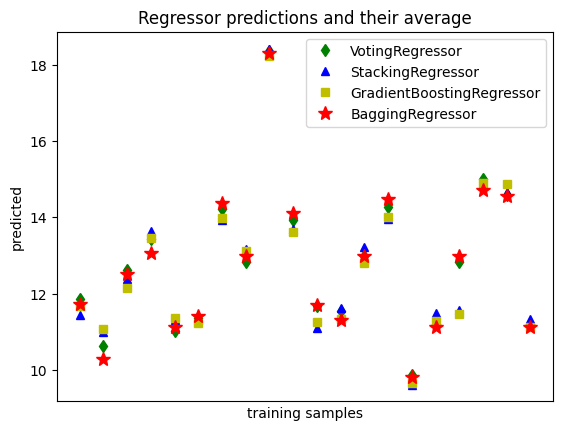

In [14]:
import os
plt.figure()
plt.plot(voting_reg_pred, "gd", label="VotingRegressor")
plt.plot(stacking_reg_pred, "b^", label="StackingRegressor")
plt.plot(grad_boosting_reg_pred, "ys", label="GradientBoostingRegressor")
plt.plot(bagging_reg_pred, "r*", ms=10, label="BaggingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")
plt.savefig(os.path.join('../documents/images/', 'regressor_predictions_avg.png'))
plt.show()

Regressor metrics performance Comparison
---

In [15]:
voting_reg_pred = vt.predict(x_test_reduced_sc)
stacking_reg_pred = stack.predict(x_test_reduced_sc)
grad_boosting_reg_pred = grad.predict(x_test_reduced_sc)
bagging_reg_pred = bag.predict(x_test_reduced_sc)

In [16]:
voting_reg_pred_mse = mean_squared_error(y_test, voting_reg_pred)
stacking_reg_pred_mse = mean_squared_error(y_test, stacking_reg_pred)
grad_boosting_reg_pred_mse = mean_squared_error(y_test, grad_boosting_reg_pred)
bagging_reg_pred_mse = mean_squared_error(y_test, bagging_reg_pred)

In [17]:
voting_reg_pred_r2_score = r2_score(y_test, voting_reg_pred)
stacking_reg_pred_r2_score = r2_score(y_test, stacking_reg_pred)
grad_boosting_reg_r2_score = r2_score(y_test, grad_boosting_reg_pred)
bagging_reg_pred_r2_score = r2_score(y_test, bagging_reg_pred)

In [18]:
voting_reg_pred_var_score = explained_variance_score(y_test, voting_reg_pred)
stacking_reg_pred_var_score = explained_variance_score(y_test, stacking_reg_pred)
grad_boosting_reg_var_score = explained_variance_score(y_test, grad_boosting_reg_pred)
bagging_reg_pred_var_score = explained_variance_score(y_test, bagging_reg_pred)

In [19]:
# Create lists for plotting
regressors = ['Voting', 'Stacking', 'Gradient boosting', 'Bagging']
mse_values = [voting_reg_pred_mse, stacking_reg_pred_mse, grad_boosting_reg_pred_mse, bagging_reg_pred_mse]
r_two_scores = [voting_reg_pred_r2_score, stacking_reg_pred_r2_score, grad_boosting_reg_r2_score, bagging_reg_pred_r2_score]
variance_scores = [voting_reg_pred_var_score, stacking_reg_pred_var_score, grad_boosting_reg_var_score, bagging_reg_pred_var_score]

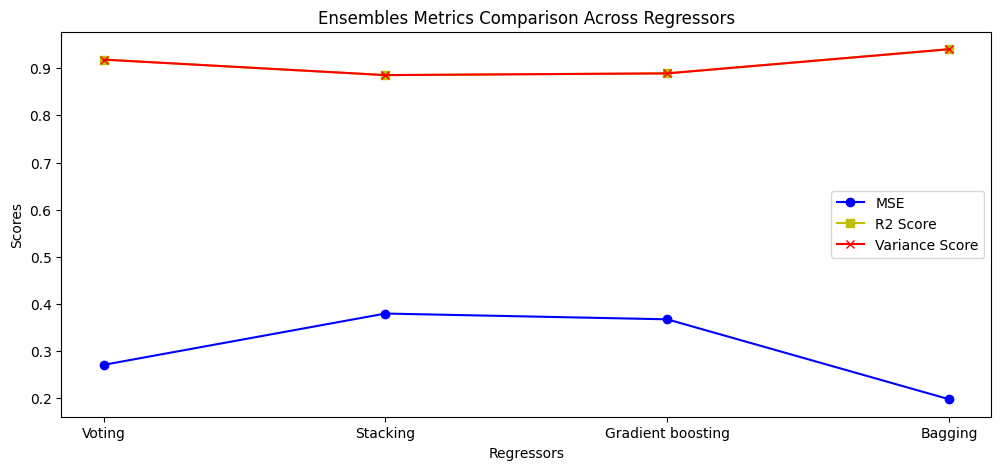

In [20]:
# Plotting
plt.figure(figsize=(12, 5))
plt.plot(regressors, mse_values, marker='o', linestyle='-', color='b')
plt.plot(regressors, variance_scores, marker='s', linestyle='-', color='y')
plt.plot(regressors, r_two_scores, marker='x', linestyle='-', color='r')

# Adding titles and labels
plt.title('Ensembles Metrics Comparison Across Regressors')
plt.xlabel('Regressors')
plt.ylabel('Scores')
plt.legend(['MSE', 'R2 Score', 'Variance Score'], loc='center right')
plt.savefig(os.path.join('../documents/images/', 'metrics_performance_scores_line.png'))
# Displaying the plot
plt.show()

In [21]:
# Sample data for two regressors: Random Forest and Voting Regressor
"""metrics_<name> = [<mse>, <R_2score>]"""
metrics_voting = [voting_reg_pred_mse, voting_reg_pred_r2_score]
metrics_stacking = [stacking_reg_pred_mse, stacking_reg_pred_r2_score]
metrics_bagging = [bagging_reg_pred_mse, bagging_reg_pred_r2_score]
metrics_grad = [grad_boosting_reg_pred_mse, grad_boosting_reg_r2_score]

# Names of the regressors and metrics
regressors = ['Voting', 'Stacking', 'Gradient boosting', 'Bagging']
metrics_names = ['MSE', 'R2 Score']

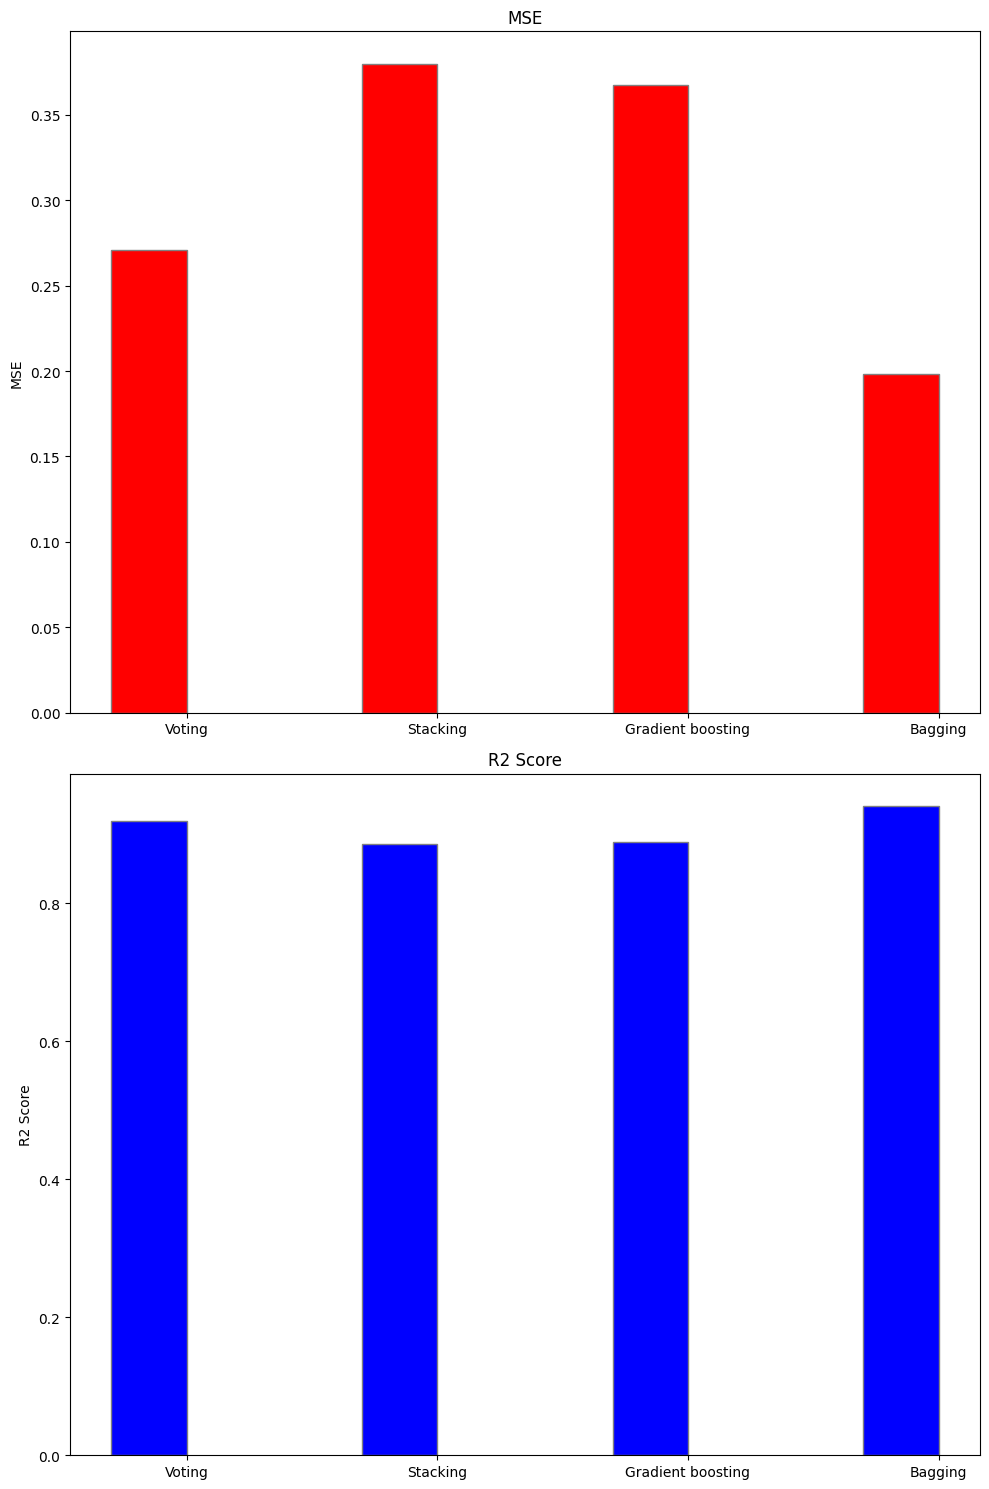

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Number of metrics
num_metrics = len(metrics_names)

# colors for the bars
colors = ['r', 'b']

# Create subplots: one row for each metric
fig, axs = plt.subplots(nrows=num_metrics, ncols=1, figsize=(10, 15))
# Width of the bars
barWidth = 0.3
# Loop over each metric and create a bar chart
for i in range(num_metrics):
    r1 = np.arange(len(regressors))
    r2 = [x + barWidth for x in r1]
    # Plot the bar chart for each metric
    
    axs[i].bar(r1, [metrics_voting[i], metrics_stacking[i], metrics_grad[i], metrics_bagging[i]],  color=colors[i], width=barWidth, edgecolor='grey', label='RF')
    # Set the subplot title and labels
    axs[i].set_title(metrics_names[i])
    axs[i].set_xticks([r + barWidth / 2 for r in range(len(regressors))], regressors)
    axs[i].set_ylabel(metrics_names[i])
# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join('../documents/images/', 'metrics_performance_scores_bar.png'))
# Show the plots
plt.show()
